In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('pres_tweets.csv')
df.head()

,Unnamed: 0,candidate,text,sentiment
0,0,Bernie Sanders,Those who aren’t a part of the Campus Corps Pr...,positive
1,1,Bernie Sanders,https://t.co/VdPbB6z3fY,neutral
2,2,Bernie Sanders,Bernie Sanders’ first grade recitation partner...,positive
3,3,Bernie Sanders,Linda Sarsour Is Too Antisemitic For The Women...,neutral
4,4,Bernie Sanders,"For the record, Bernie Sanders has extensive s...",positive


These tweets were classified using the TextBlob API. Future plans with the dataset are to train some more advanced models and see how they differ from the TextBlob sentiment classifications.

One of the tweets appears to have been mislabeled. Let's drop this row.

In [15]:
df.drop(index = df.loc[df.candidate == 'positive'].index, inplace=True)

In [26]:
# Create df to save summary statistics

summ_df = pd.DataFrame()

for i,candidate in enumerate(df.candidate.unique()):

    summ_df.loc[i,'candidate'] = candidate
    
    # Absolute totals 
    summ_df.loc[i, 'total_pos'] = len(df.loc[(df.candidate == candidate) & (df.sentiment=='positive')])
    summ_df.loc[i, 'total_neg'] = len(df.loc[(df.candidate == candidate) & (df.sentiment=='negative')])
    summ_df.loc[i, 'total_neutral'] = len(df.loc[(df.candidate == candidate) & (df.sentiment=='neutral')])

    # Total tweets
    summ_df.loc[i, 'total_tweets'] = summ_df.loc[i,['total_pos', 'total_neg', 'total_neutral']].sum()
    
    # Percentages relative to candidate totals
    summ_df.loc[i, 'rel_pos'] = summ_df.loc[i,'total_pos']/summ_df.loc[i, 'total_tweets']
    summ_df.loc[i, 'rel_neg'] = summ_df.loc[i,'total_neg']/summ_df.loc[i, 'total_tweets']
    summ_df.loc[i, 'rel_neutral'] = summ_df.loc[i,'total_neutral']/summ_df.loc[i, 'total_tweets']    
    
 

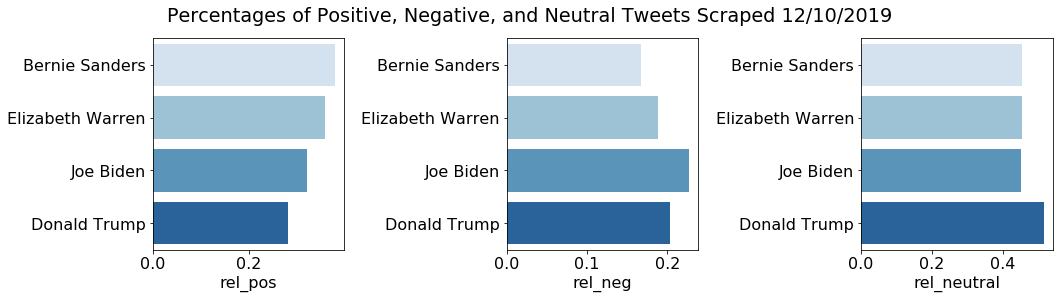

In [57]:
rel_vars = ['rel_pos', 'rel_neg', 'rel_neutral']

plt.rcParams.update({'font.size':16})
plt.figure(figsize=(15,4))
plt.suptitle('Percentages of Positive, Negative, and Neutral Tweets Scraped 12/10/2019',y=1.05)

for i, v in enumerate(rel_vars):
    plt.subplot(1,3,i+1)
    sns.barplot(x=v, y='candidate', data=summ_df, palette='Blues')
    plt.ylabel('')

plt.tight_layout()
plt.show()

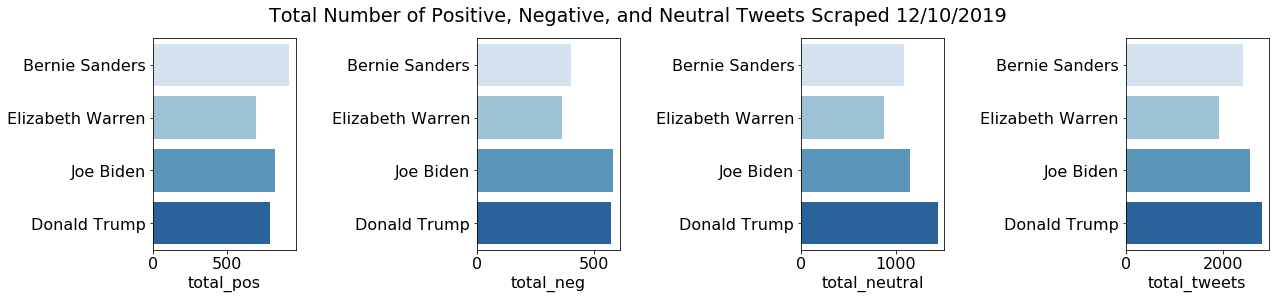

In [62]:
tot_vars = ['total_pos', 'total_neg', 'total_neutral', 'total_tweets']

plt.figure(figsize=(18,4))
plt.suptitle('Total Number of Positive, Negative, and Neutral Tweets Scraped 12/10/2019',y=1.05)

for i, v in enumerate(tot_vars):
    plt.subplot(1,4,i+1)
    sns.barplot(x=v, y='candidate', data=summ_df, palette='Blues')
    plt.ylabel('')

plt.tight_layout()
plt.show()